### Chapter 6 exercises: classes

#### Time for some fun:
We have built a Tank object that fires canonball objects. You have two tasks:
1. Change the angle of the tank in such a way that you end up hitting the target
2. Add wind to this game, with speed in either the positive or negative x-direction and make sure the canonball's path is affected by this wind. This wind is normally distributed with mean 0 m/s and sigma 30 m/s and changes every minute 

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
class Tank:
    
    def __init__(self):
        self.angle=45
        self.pos = [0,0]
        self.image = {}
        self.power =  300
        self.target = [np.random.randint(0,10000),0]
        self.time = dt.datetime.now()
        self.wind_speed = np.random.normal(0,30)
        
    def change_angle(self, new_angle):
        self.angle =  new_angle
        
    
    def change_target(self):
        self.target = [np.random.randint(0,10000),0]
            
    def move(self,x):
        self.pos[0] = self.pos[0]+x
    
    def update_wind(self):
        new_time = dt.datetime.now()
        if (new_time - self.time).seconds > 60:
            self.wind_speed = np.random.normal(0,30)
            self.time  = new_time
        
    def fire(self):
        self.update_wind()
        canonball = Canonball().fire(self.pos, self.angle, self.power, self.target, self.wind_speed)
        return canonball

In [9]:
class Canonball:
    
    def __init__(self):
        self.size = 5
        self.mass = 10
        self.acceleration  = (0,-9.81)
        self.speed = [0,0]
        self.pos = [0,0]
        self.fired = 0
        
    def fire(self, pos, angle, power, target, wind_speed):
        self.pos = pos
        self.speed  = [np.cos(2*np.pi*angle/360)*power + wind_speed, np.sin(2*np.pi*angle/360)*power]
        self.target = target
        self.fired = 1
        return self
    
    def balistic_path(self):
        if self.fired==1:
            airtime = (-self.speed[1]/self.acceleration[1]) + np.sqrt(
                (self.speed[1]**2-2*self.pos[1]*self.acceleration[1])/self.acceleration[1]**2
            )
            t = np.linspace(0,airtime,100)
            x = np.zeros(len(t))
            y = np.zeros(len(t))
            for i, j in enumerate(t):
                x[i]  = self.pos[0]+self.speed[0]*j+0.5*self.acceleration[0]*(j**2)
                y[i] = self.pos[1]+self.speed[1]*j+0.5*self.acceleration[1]*(j**2)
            plt.xlabel('distance (m)')
            plt.ylabel('height (m)')
            plt.plot(self.target[0], self.target[1], marker='s', markerfacecolor='tab:red', label='target',linewidth=0)
            plt.plot(self.pos[0], self.pos[1], marker='o', markerfacecolor='green', label='tank', linewidth=0)
            plt.plot(x[-1],y[-1], marker = '*', label='canon impact', markersize=12, linewidth=0)
            plt.plot(x,y, color='skyblue', label = 'canonball path')   
            plt.legend()
            message = "You've hit the target!" if np.linalg.norm(self.target-np.array([x[-1],y[-1]]))<50 else "You've missed the target"
            plt.title(message)
            return plt.show()


In [4]:
my_tank = Tank()

The current wind speed is 61.369004940718355.


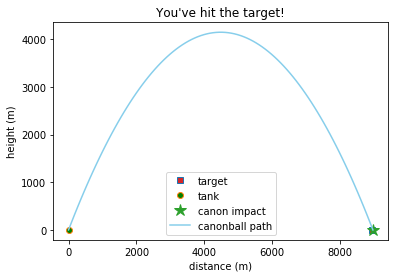

In [20]:
print(f'The current wind speed is {my_tank.wind_speed}.')
my_tank.change_angle(72)
canonball = my_tank.fire()
canonball.balistic_path()